In [17]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import utils
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import seaborn as sns

In [18]:
GTZAN_DIR = '/Users/nkkaushal/Documents/Fall22/ECS_271/Project/dataset/GTZAN_data/'
df = pd.read_csv(GTZAN_DIR+"features_3_sec.csv")

Text(0, 0.5, 'Principal Component 2')

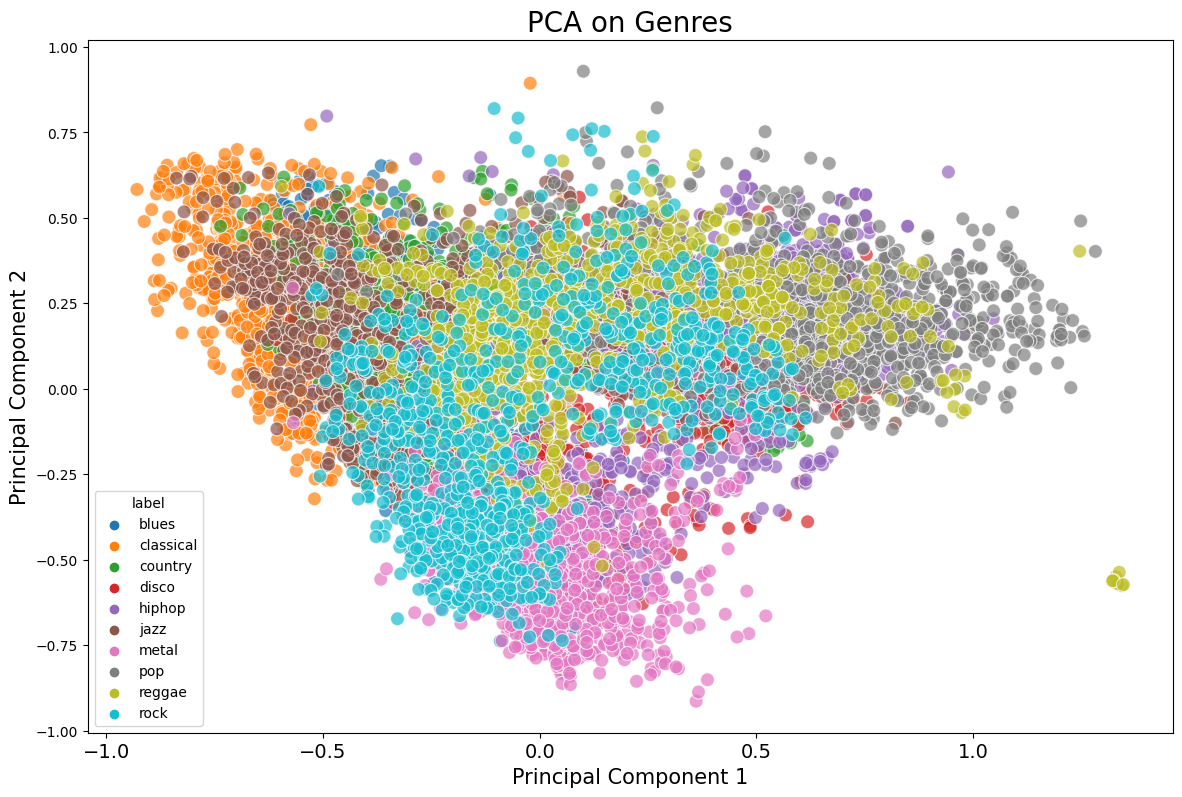

In [20]:
data = df.iloc[:, 1:]
data = data.dropna()
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (14, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

In [3]:
filename = utils.get_audio_path(GTZAN_DIR, 1, 'blues')
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

File: /Users/nkkaushal/Documents/Fall22/ECS_271/Project/dataset/GTZAN_data/genres_original/blues/blues.00001.wav
Duration: 30.01s, 661794 samples


/var/folders/v3/49xwmkw17sjdq3cp1fp4wptr0000gn/T/ipykernel_17864/3988748346.py:1: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(x, sr, alpha=0.5)


(-1.0, 1.0)

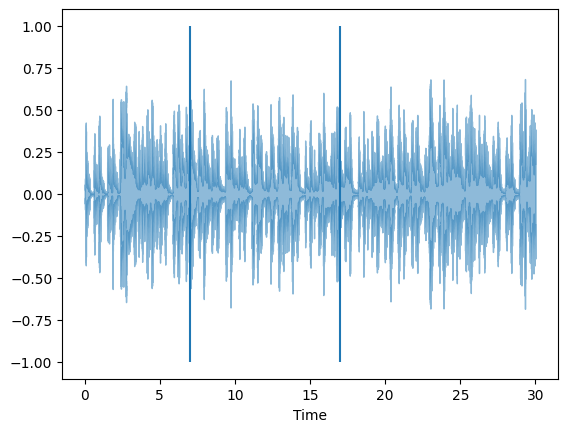

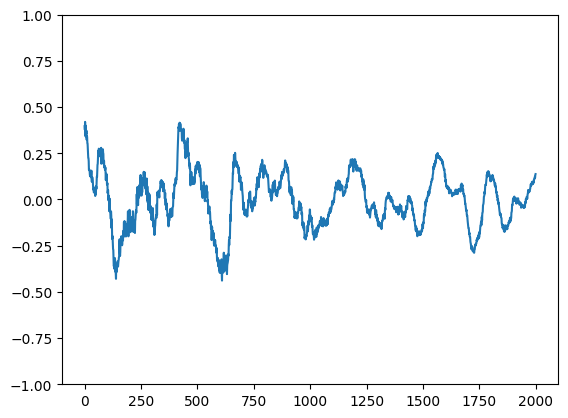

In [4]:
librosa.display.waveshow(x, sr, alpha=0.5)
plt.vlines([start, end], -1, 1)

start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1))

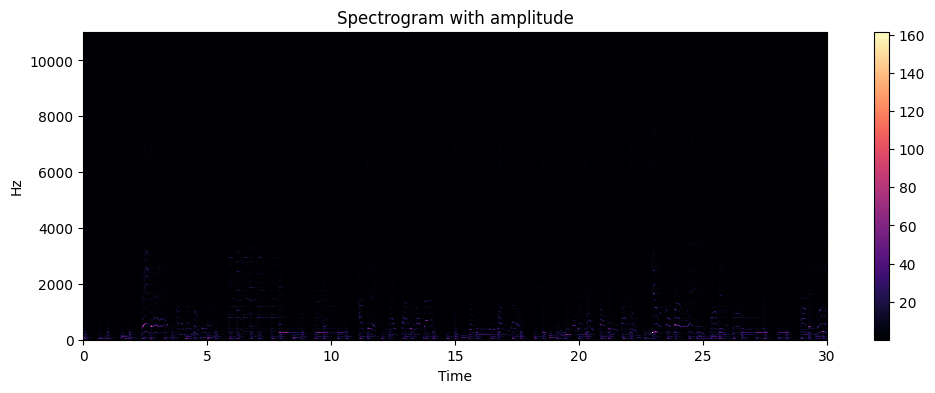

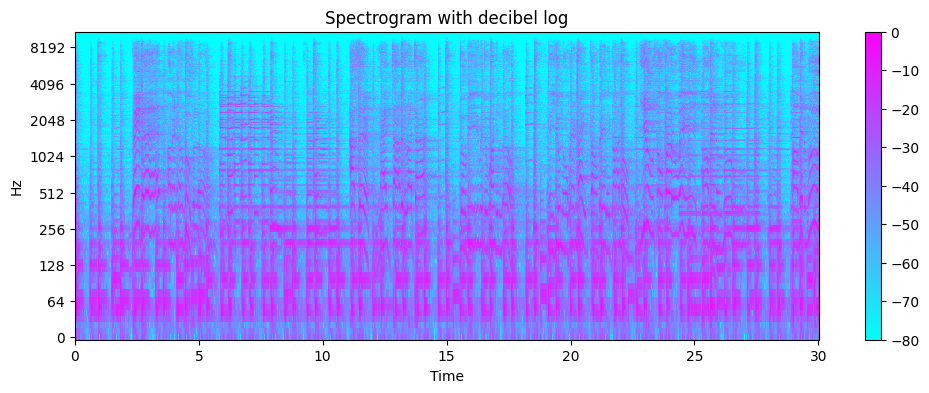

In [6]:
# Default FFT window size
n_fft = 2048 # window size
hop_length = 512 # window hop length for STFT

stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectrogram with amplitude")
plt.show()

plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectrogram with decibel log")
plt.show()

/var/folders/v3/49xwmkw17sjdq3cp1fp4wptr0000gn/T/ipykernel_17864/1693693447.py:1: FutureWarning: Pass y=[ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec = librosa.feature.melspectrogram(x, sr=sr)


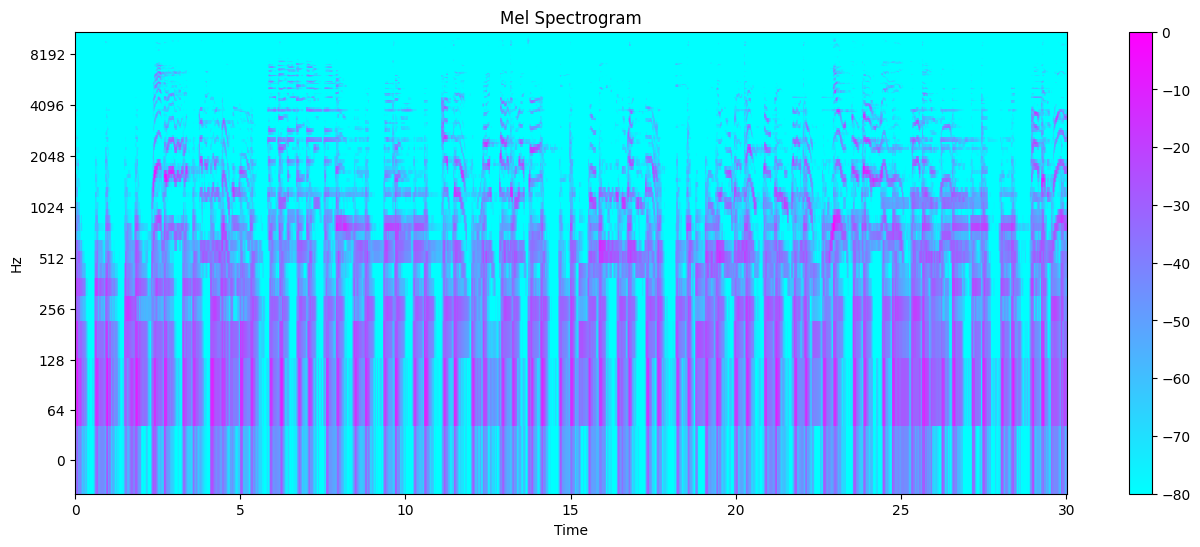

In [10]:
mel_spec = librosa.feature.melspectrogram(x, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()

In [11]:
zcrs = librosa.feature.zero_crossing_rate(x)

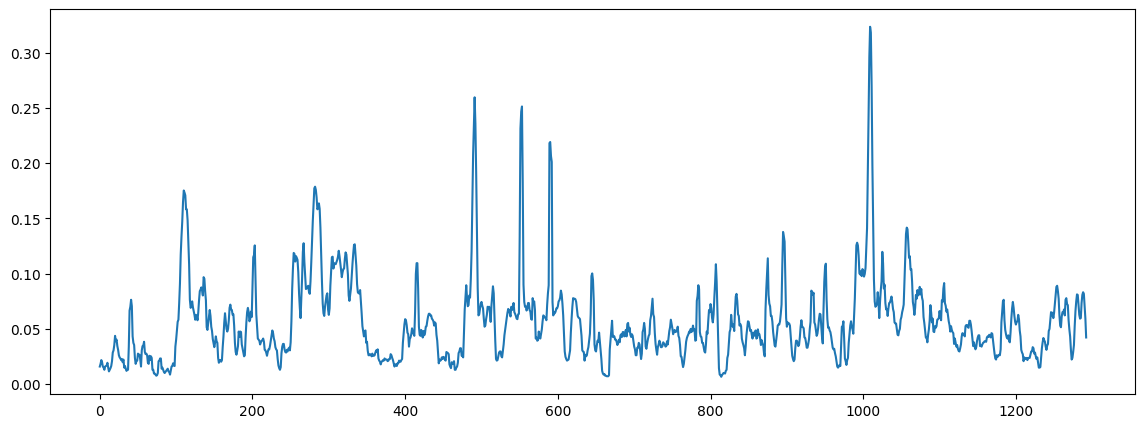

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

In [6]:
df = pd.read_csv(GTZAN_DIR+"features_3_sec.CSV")

In [7]:
ipd.display(df.head())

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [33]:
features = df[['filename','label']].copy()
features[['ZRC' + str(ind) for ind in range(1,31)]] = 0.0
features[['MFCC' + str(ind) for ind in range(1,61)]] = 0.0


In [34]:
seg = 0
for i in range(features.shape[0]):

    if seg == 10: 
        seg = 0

    try:
        track_id = int(features['filename'][i].split('.')[1])
        
        filename = utils.get_audio_path(GTZAN_DIR, track_id, features['label'][i])

        x_org, sr = librosa.load(filename, sr=None, mono=True)

        segSize = x_org.shape[0]//10

        # for seg in range(nsegments):
        start = seg*segSize
        end = start+segSize
        x = x_org[start:end]

        chunkSize = x.size//30

        stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
        mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
        del stft
        mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=30)

        mfcc_mean_var = np.array([[np.mean(mfcc[i]), np.var(mfcc[i])] for i in range(mfcc.shape[0])])
        
        for j in range(30):
            if j*chunkSize+chunkSize < x.size:
                audio_chunk = x[j*chunkSize:j*chunkSize+chunkSize]
                f = librosa.feature.zero_crossing_rate(audio_chunk, frame_length=2048, hop_length=512) 
                features.loc[i, 'ZRC'+str(j+1)] = f.mean()
                features.loc[i, 'MFCC'+str(j + 1)] = mfcc_mean_var[j][0]
                features.loc[i, 'MFCC'+str(30 + j + 1)] = mfcc_mean_var[j][1]
        seg += 1

    except Exception as e:
        print('{}: {}'.format(i, repr(e)))
    
features.head()        

/Users/nkkaushal/Documents/Fall22/ECS_271/Project/venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


5532: NoBackendError()
5533: NoBackendError()
5534: NoBackendError()
5535: NoBackendError()
5536: NoBackendError()
5537: NoBackendError()
5538: NoBackendError()
5539: NoBackendError()
5540: NoBackendError()
5541: NoBackendError()


,filename,label,ZRC1,ZRC2,ZRC3,ZRC4,ZRC5,ZRC6,ZRC7,ZRC8,...,MFCC51,MFCC52,MFCC53,MFCC54,MFCC55,MFCC56,MFCC57,MFCC58,MFCC59,MFCC60
0,blues.00000.0.wav,blues,0.078906,0.060352,0.062793,0.061621,0.075488,0.046094,0.038281,0.067090,...,25.767027,23.931028,34.657429,44.848213,154.223801,131.930756,98.477097,64.571533,45.822002,143.311584
1,blues.00000.1.wav,blues,0.090137,0.046680,0.047168,0.066211,0.048047,0.097656,0.080176,0.086621,...,42.941212,34.009361,45.374420,40.448303,48.643360,37.308743,24.928782,35.750946,28.889429,49.435734
2,blues.00000.2.wav,blues,0.026855,0.032617,0.050586,0.047461,0.074707,0.053809,0.037793,0.039160,...,51.492481,32.989716,41.218899,44.423264,41.378250,57.789398,68.744476,67.761932,99.758430,81.106384
3,blues.00000.3.wav,blues,0.055078,0.048047,0.062207,0.066309,0.059668,0.042480,0.040234,0.070508,...,24.682440,24.928068,28.773479,35.624866,33.094357,23.355219,23.492764,39.537956,57.385269,114.946243
4,blues.00000.4.wav,blues,0.042773,0.042773,0.054980,0.055957,0.054980,0.055078,0.058203,0.046875,...,18.678181,30.941330,35.360229,36.096958,33.462742,21.147442,38.323837,35.466103,57.333546,92.115395


In [10]:
features.to_csv('dataset/GTZAN_DATA/features.csv', index=False)

In [35]:
features.to_csv('dataset/GTZAN_DATA/zcr_mfcc_3_sec.csv', index=False)